# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.2.0-rc3
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


# Task 2: Preprocess Data

In [0]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [19]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

In [0]:
class_names = ['aeroplane', 'car', 'bird']

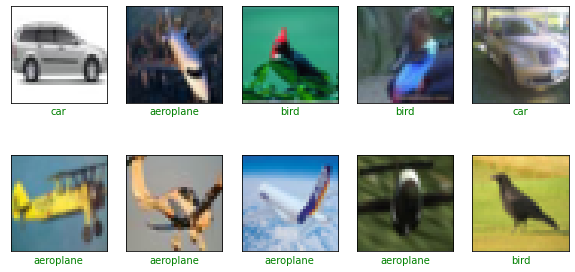

In [20]:
def show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
  x = x[indices]
  y = y[indices]
  p = p[indices]
  plt.figure(figsize = (10,5))
  for i in range(10):
    plt.subplot(2,5,1 + i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show()

show_random_examples(x_train, y_train, y_train)

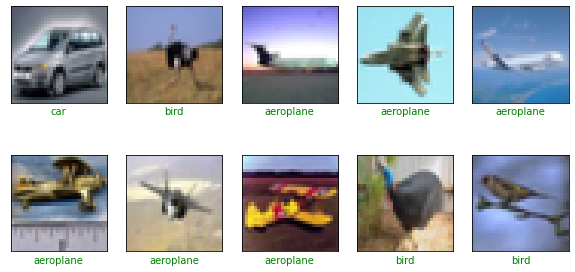

In [21]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters, 3, activation= 'relu', padding= 'same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3, activation= 'relu'))
    model.add(MaxPooling2D(pool_size= 2))
    model.add(Dropout(0.5))
    return model
  model = tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))
  
  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)

  model.add(Flatten())
  model.add(Dense(3, activation = 'softmax'))
  model.compile(
      loss = 'categorical_crossentropy', 
      optimizer = 'adam', metrics = ['accuracy']
  )
  return model
model = create_model()
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 15, 15, 64)       

# Task 5: Train the Model

In [33]:
h = model.fit(
    x_train/255., y_train, validation_data = (x_test/255., y_test), epochs = 11, batch_size = 128, 
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor= 'val_accuracy', patience = 3),
                 tf.keras.callbacks.ModelCheckpoint(
                     'models/model_{val_accuracy:.3f}.h5', 
                     save_best_only = True, save_weights_only = False,
                     monitor = 'val_accuracy'
                 )
    ]
)

Epoch 1/11
118/118 [==============================] - 1s 12ms/step - loss: 0.8979 - accuracy: 0.6737 - val_loss: 2.6938 - val_accuracy: 0.3333
Epoch 2/11
118/118 [==============================] - 1s 11ms/step - loss: 0.5628 - accuracy: 0.7749 - val_loss: 2.7500 - val_accuracy: 0.3893
Epoch 3/11
118/118 [==============================] - 1s 11ms/step - loss: 0.4929 - accuracy: 0.7999 - val_loss: 2.4304 - val_accuracy: 0.4607
Epoch 4/11
118/118 [==============================] - 1s 11ms/step - loss: 0.4465 - accuracy: 0.8217 - val_loss: 1.7838 - val_accuracy: 0.5570
Epoch 5/11
118/118 [==============================] - 1s 11ms/step - loss: 0.4145 - accuracy: 0.8371 - val_loss: 0.6759 - val_accuracy: 0.7280
Epoch 6/11
118/118 [==============================] - 1s 10ms/step - loss: 0.3874 - accuracy: 0.8480 - val_loss: 0.6950 - val_accuracy: 0.7237
Epoch 7/11
118/118 [==============================] - 1s 11ms/step - loss: 0.3594 - accuracy: 0.8607 - val_loss: 0.4904 - val_accuracy: 0.8013

# Task 6: Final Predictions

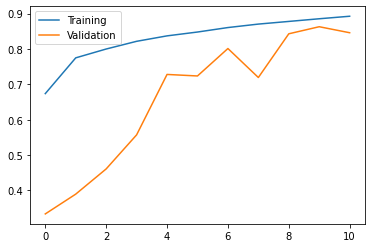

In [35]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']
plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label = 'Validation')
plt.legend()
plt.show()

In [0]:
model = tf.keras.models.load_model('models/model_0.924.h5')

In [0]:
preds = model.predict(x_test/255.)

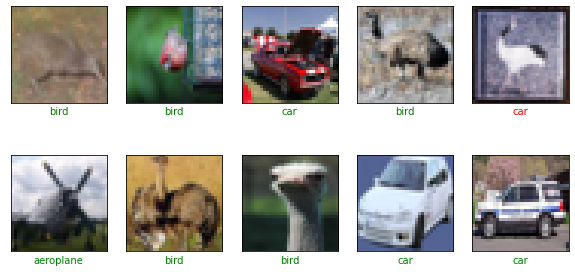

In [41]:
show_random_examples(x_test, y_test, preds)